# HW2

Sorry again for the late. It costs me too much time on getting the genre data from API.

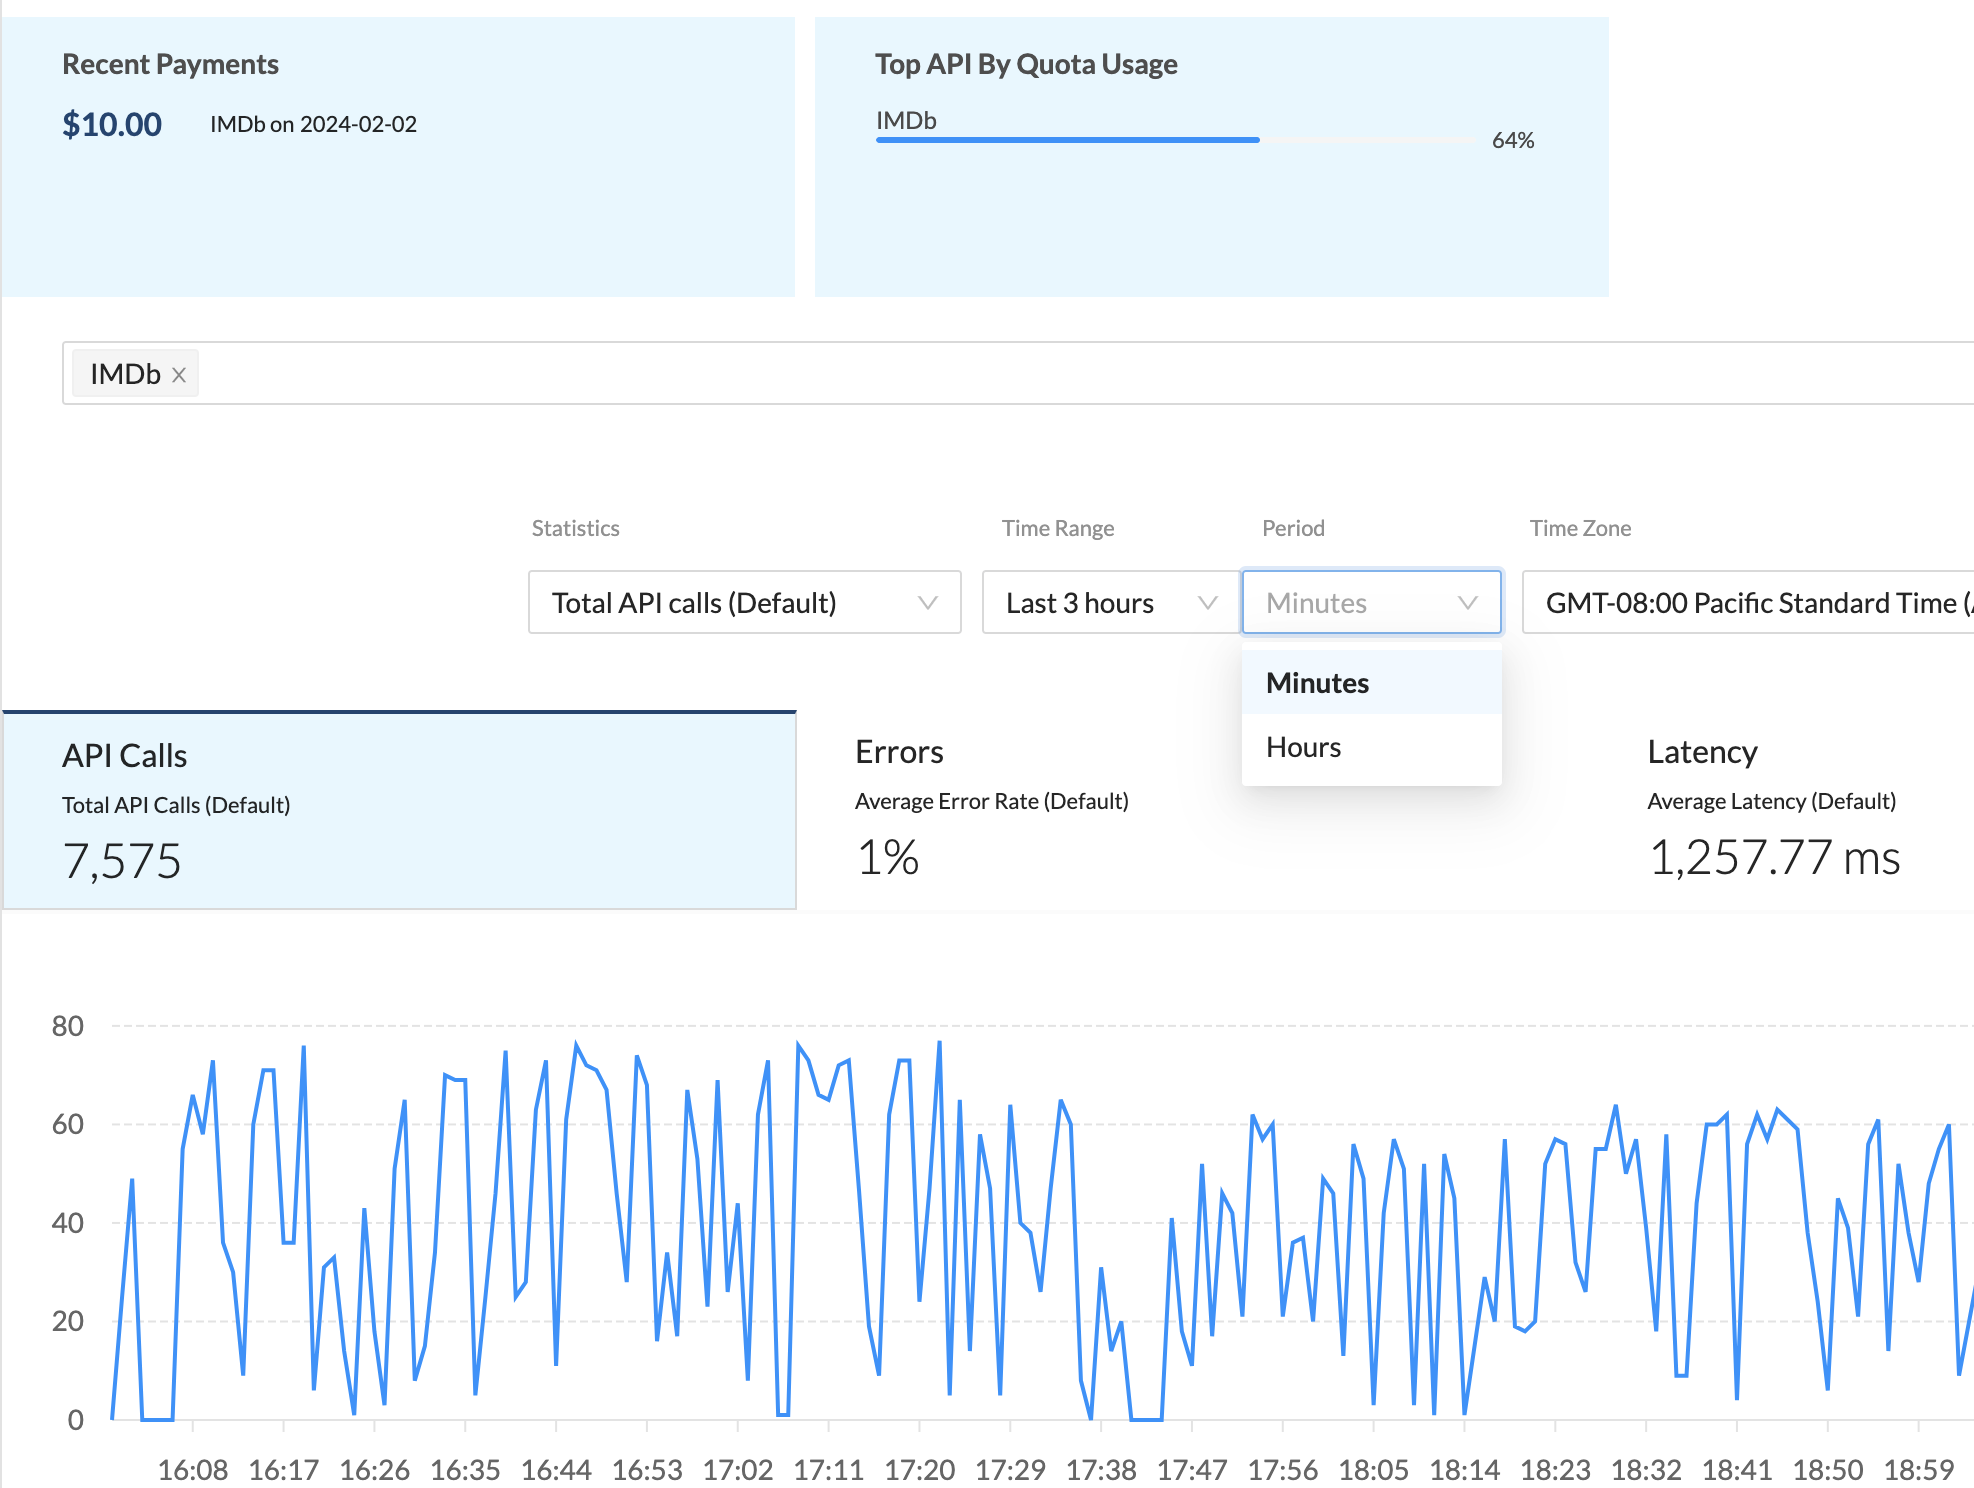

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests


## What content would be attractive for a Streaming platform?

In [3]:
file_path = '/content/drive/MyDrive/DSCI599/Datasets/Entertainment Dataset/Streaming Dataset/Amazon Prime (excluding Amazon Other) catalogue USA 2016-2020.xlsx'
amazon_df = pd.read_excel(file_path)
amazon_df.head()

,YearMonth,Platform,Country,Content Type,Title,First Release Year,Primary Genre,SecondaryGenre,Genre,Duration,Duration Group,Number of Episodes,Primary Production Country,Primary Production Company
0,Jan-2016,Amazon Prime Video,USA,Movie,...and the Earth Did Not Swallow Him,1995,Drama,Miscellaneous,Drama - Miscellaneous,99,90 - 120 minutes,-,USA,kino international
1,Jan-2016,Amazon Prime Video,USA,Movie,'neath Brooklyn Bridge,1942,Romance,Drama,Romance - Drama,61,60 - 90 minutes,-,USA,Sam Katzman Productions
2,Jan-2016,Amazon Prime Video,USA,Movie,"""blue Lamp, The""",[Not given],Action & Adventure,Drama,Action & Adventure - Drama,-,No Group,-,USA,Viacom
3,Jan-2016,Amazon Prime Video,USA,Movie,"""shostakovich, Lady Macbeth of Mtsensk - Eva-m...",2015,Entertainment,Music,Entertainment - Music,165,150 - 180 minutes,-,No Country Assigned,Der Nederlandse Opera
4,Jan-2016,Amazon Prime Video,USA,Movie,#lucky Number,2015,Romance,Comedy,Romance - Comedy,79,60 - 90 minutes,-,USA,36films


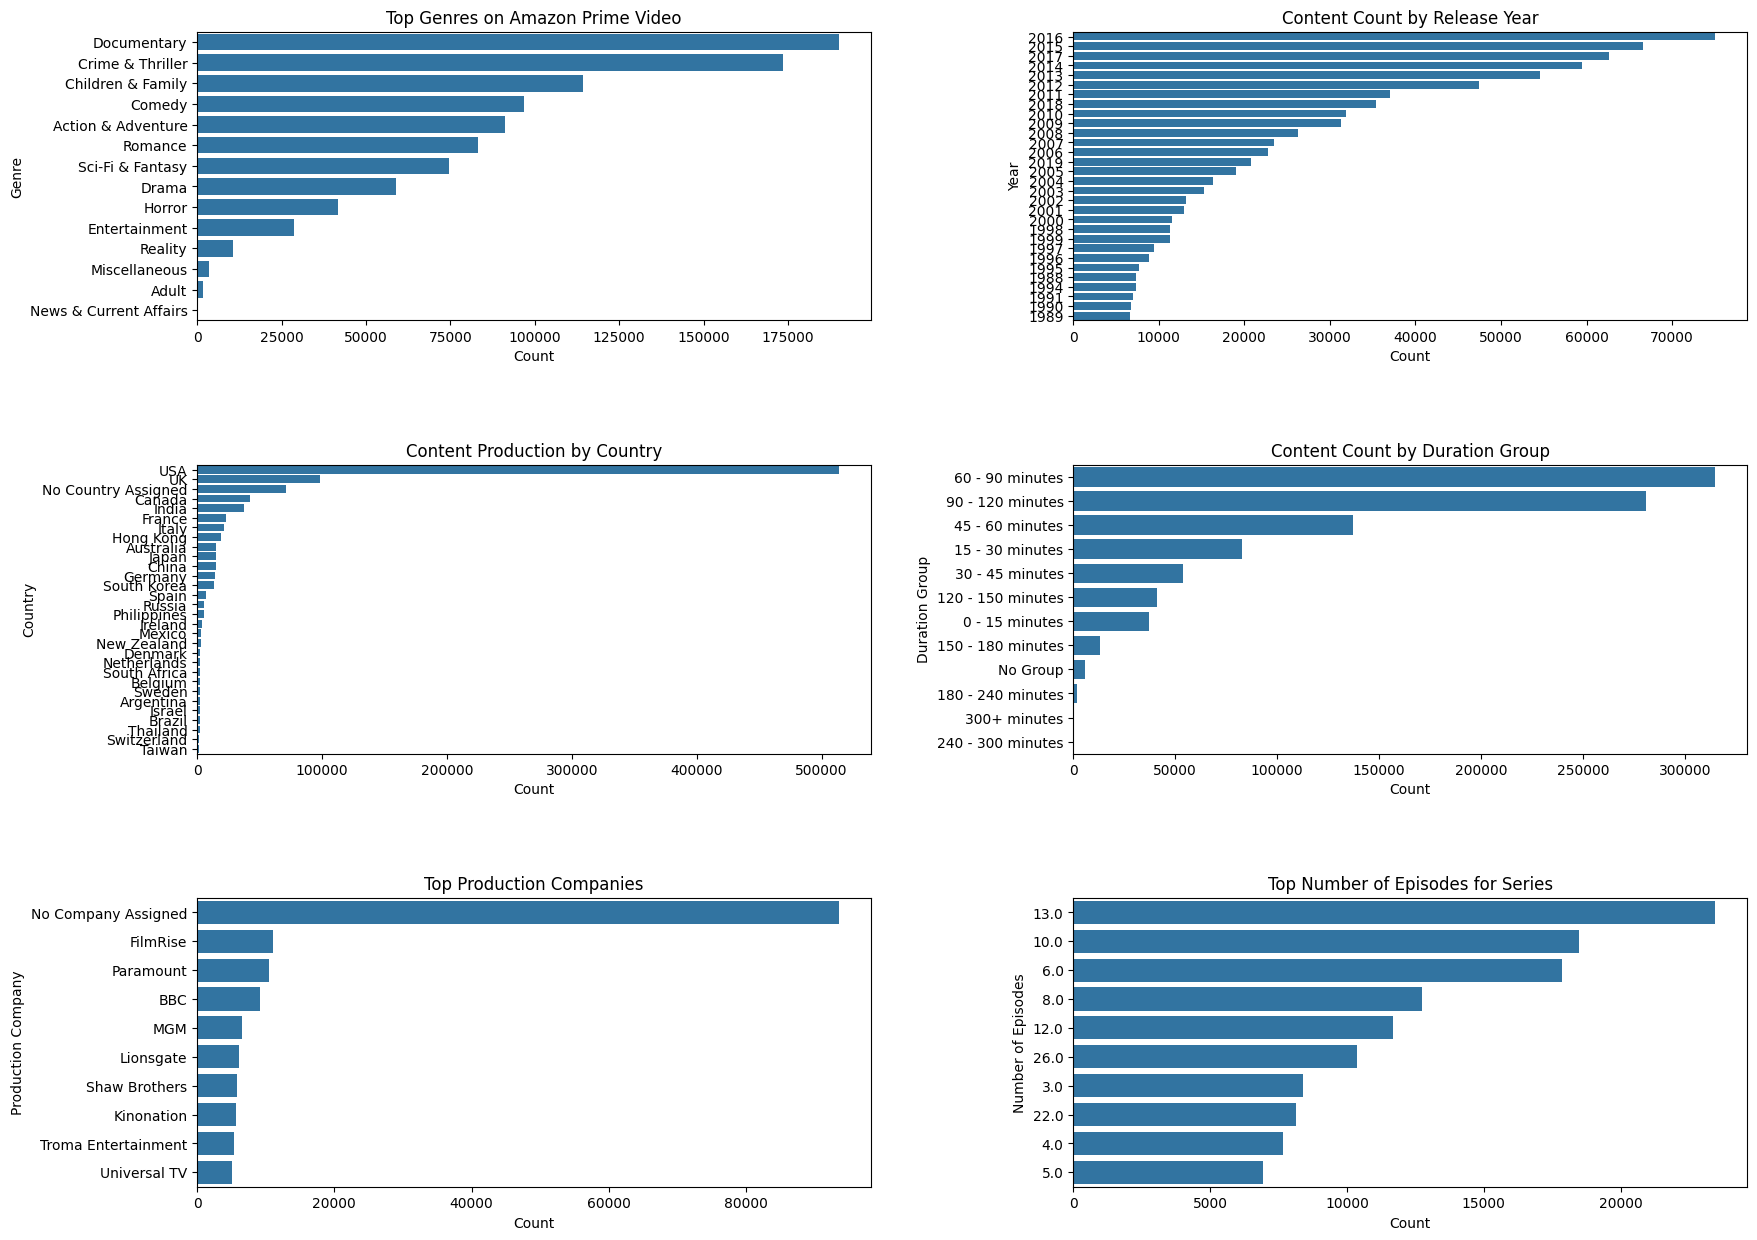

In [7]:
# 1. Analysis of popular content types
# Count the amount of content for each major genre
genre_counts = amazon_df['Primary Genre'].value_counts()

# 2. Release time analysis
# Count the number of content in each release year
release_year_counts = amazon_df['First Release Year'].value_counts().head(30)

# 3. Geographical distribution analysis
# Count the amount of content produced in each country
country_production_counts = amazon_df['Primary Production Country'].value_counts().head(30)

# 4. Content duration analysis
# Count the number of contents in each duration group
duration_group_counts = amazon_df['Duration Group'].value_counts()

# 5. Series analysis
# If it exists, count the number of episodes (here we assume that the number of episodes of the series is a number)
if 'Number of Episodes' in amazon_df.columns:
    amazon_df['Number of Episodes'] = pd.to_numeric(amazon_df['Number of Episodes'], errors='coerce')
    episode_counts = amazon_df['Number of Episodes'].value_counts()

# 6. Production company influence
# Count the amount of content produced by each production company
production_company_counts = amazon_df['Primary Production Company'].value_counts()


plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.subplot(3, 2, 1)
genre_counts_sorted = genre_counts.sort_values(ascending=False)
sns.barplot(x=genre_counts_sorted.values, y=genre_counts_sorted.index)
plt.title('Top Genres on Amazon Prime Video')
plt.xlabel('Count')
plt.ylabel('Genre')

plt.subplot(3, 2, 2)
release_year_counts_sorted = release_year_counts.sort_values(ascending=False)
sns.barplot(x=release_year_counts_sorted.values, y=release_year_counts_sorted.index)
plt.title('Content Count by Release Year')
plt.xlabel('Count')
plt.ylabel('Year')

plt.subplot(3, 2, 3)
country_production_counts_sorted = country_production_counts.sort_values(ascending=False)
sns.barplot(x=country_production_counts_sorted.values, y=country_production_counts_sorted.index)
plt.title('Content Production by Country')
plt.xlabel('Count')
plt.ylabel('Country')

plt.subplot(3, 2, 4)
duration_group_counts_sorted = duration_group_counts.sort_values(ascending=False)
sns.barplot(x=duration_group_counts_sorted.values, y=duration_group_counts_sorted.index)
plt.title('Content Count by Duration Group')
plt.xlabel('Count')
plt.ylabel('Duration Group')

plt.subplot(3, 2, 5)
production_company_counts_sorted = production_company_counts.sort_values(ascending=False).head(10) # 只展示前10个结果
sns.barplot(x=production_company_counts_sorted.values, y=production_company_counts_sorted.index)
plt.title('Top Production Companies')
plt.xlabel('Count')
plt.ylabel('Production Company')

plt.subplot(3, 2, 6)
episode_counts_sorted = episode_counts.sort_values(ascending=False).head(10) # 只展示前10个结果
sns.barplot(x=episode_counts_sorted.values, y=episode_counts_sorted.index.astype('str'))
plt.title('Top Number of Episodes for Series')
plt.xlabel('Count')
plt.ylabel('Number of Episodes')

plt.show()


In [9]:
file_path = '/content/drive/MyDrive/DSCI599/Datasets/Entertainment Dataset/Streaming Dataset/Hulu catalogue USA 2016-2020.xlsx'
hulu_df = pd.read_excel(file_path)

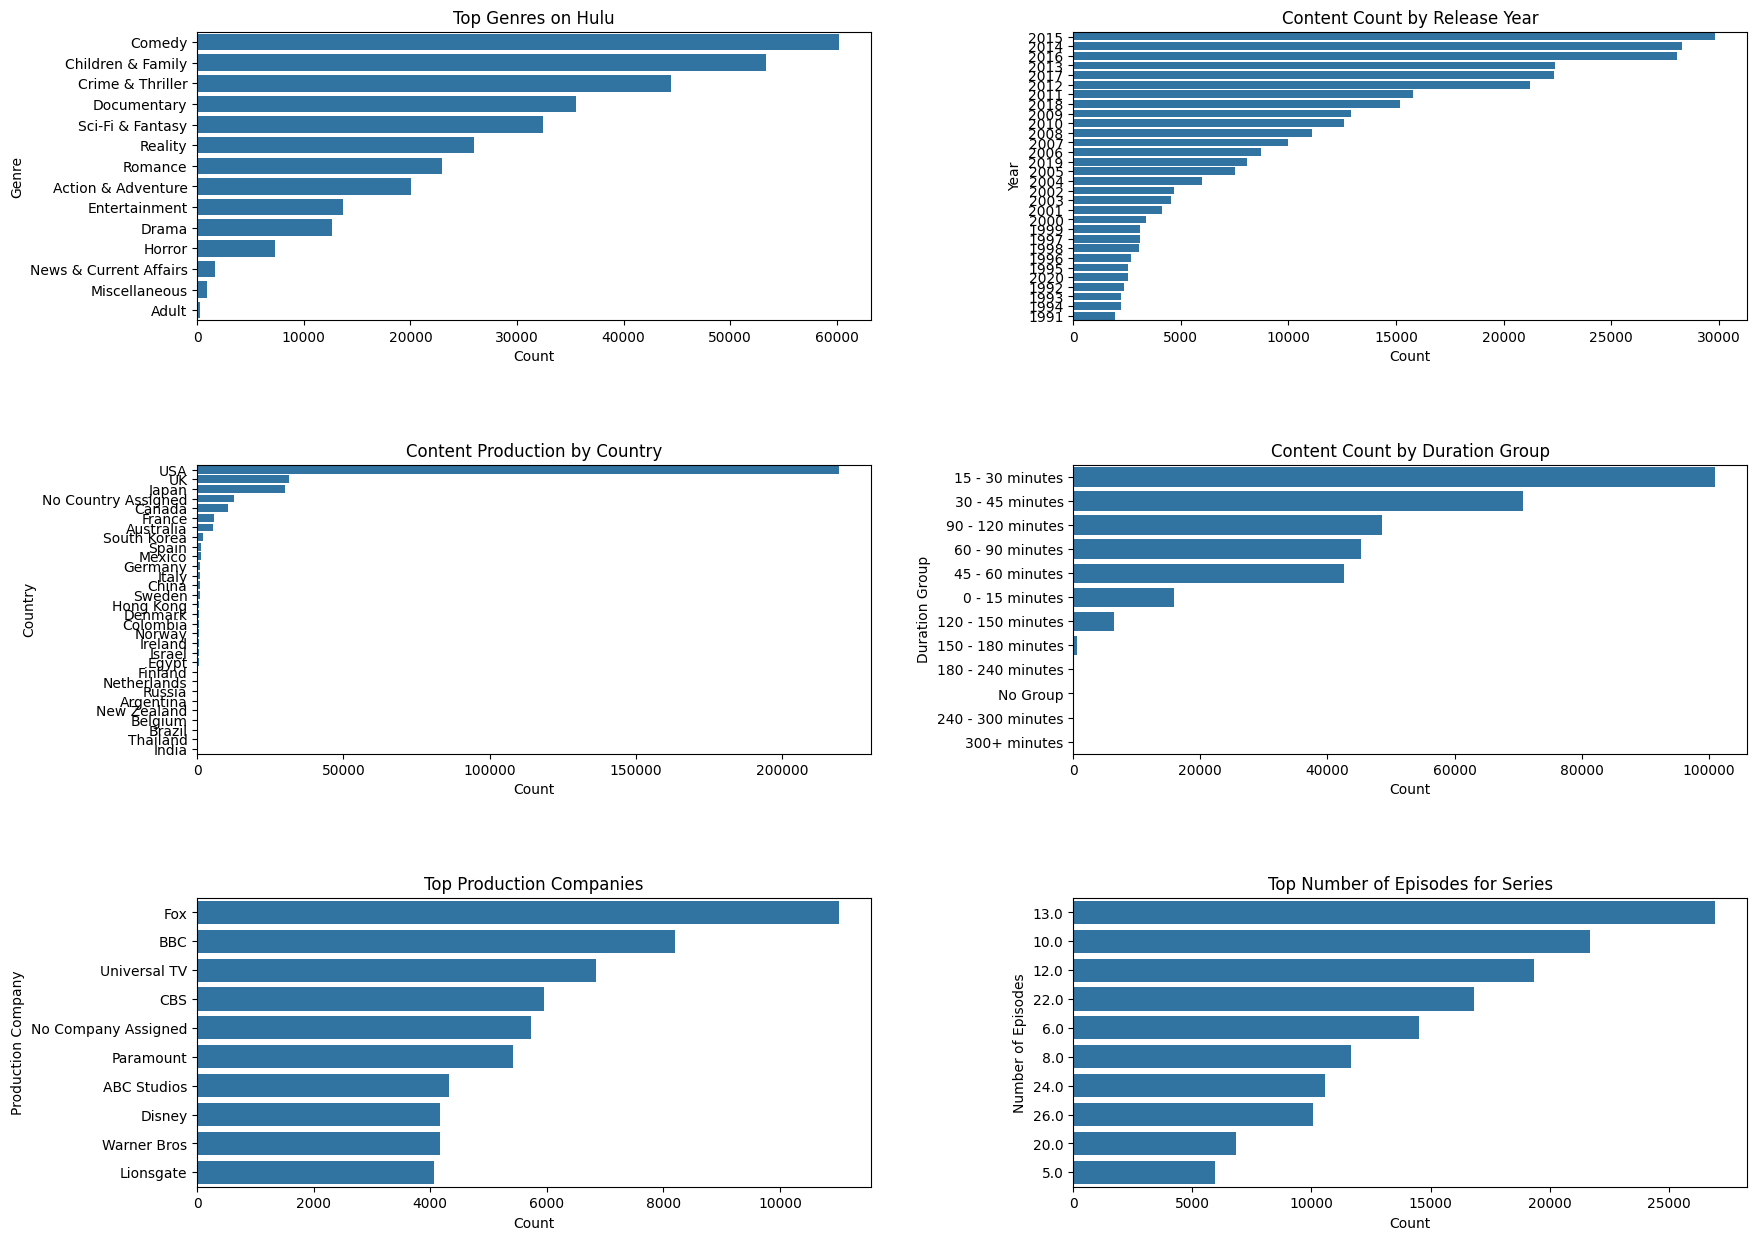

In [10]:
# 1. Analysis of popular content types
# Count the amount of content for each major genre
genre_counts = hulu_df['Primary Genre'].value_counts()

# 2. Release time analysis
# Count the number of content in each release year
release_year_counts = hulu_df['First Release Year'].value_counts().head(30)

# 3. Geographical distribution analysis
# Count the amount of content produced in each country
country_production_counts = hulu_df['Primary Production Country'].value_counts().head(30)

# 4. Content duration analysis
# Count the number of contents in each duration group
duration_group_counts = hulu_df['Duration Group'].value_counts()

# 5. Series analysis
# If it exists, count the number of episodes (here we assume that the number of episodes of the series is a number)
if 'Number of Episodes' in hulu_df.columns:
    hulu_df['Number of Episodes'] = pd.to_numeric(hulu_df['Number of Episodes'], errors='coerce')
    episode_counts = hulu_df['Number of Episodes'].value_counts()

# 6. Production company influence
# Count the amount of content produced by each production company
production_company_counts = hulu_df['Primary Production Company'].value_counts()


plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.subplot(3, 2, 1)
genre_counts_sorted = genre_counts.sort_values(ascending=False)
sns.barplot(x=genre_counts_sorted.values, y=genre_counts_sorted.index)
plt.title('Top Genres on Hulu')
plt.xlabel('Count')
plt.ylabel('Genre')

plt.subplot(3, 2, 2)
release_year_counts_sorted = release_year_counts.sort_values(ascending=False)
sns.barplot(x=release_year_counts_sorted.values, y=release_year_counts_sorted.index)
plt.title('Content Count by Release Year')
plt.xlabel('Count')
plt.ylabel('Year')

plt.subplot(3, 2, 3)
country_production_counts_sorted = country_production_counts.sort_values(ascending=False)
sns.barplot(x=country_production_counts_sorted.values, y=country_production_counts_sorted.index)
plt.title('Content Production by Country')
plt.xlabel('Count')
plt.ylabel('Country')

plt.subplot(3, 2, 4)
duration_group_counts_sorted = duration_group_counts.sort_values(ascending=False)
sns.barplot(x=duration_group_counts_sorted.values, y=duration_group_counts_sorted.index)
plt.title('Content Count by Duration Group')
plt.xlabel('Count')
plt.ylabel('Duration Group')

plt.subplot(3, 2, 5)
production_company_counts_sorted = production_company_counts.sort_values(ascending=False).head(10) # 只展示前10个结果
sns.barplot(x=production_company_counts_sorted.values, y=production_company_counts_sorted.index)
plt.title('Top Production Companies')
plt.xlabel('Count')
plt.ylabel('Production Company')

plt.subplot(3, 2, 6)
episode_counts_sorted = episode_counts.sort_values(ascending=False).head(10) # 只展示前10个结果
sns.barplot(x=episode_counts_sorted.values, y=episode_counts_sorted.index.astype('str'))
plt.title('Top Number of Episodes for Series')
plt.xlabel('Count')
plt.ylabel('Number of Episodes')

plt.show()


In [11]:
file_path = '/content/drive/MyDrive/DSCI599/Datasets/Entertainment Dataset/Streaming Dataset/Netflix catalogue USA 2016-2020.xlsx'
netflix_df = pd.read_excel(file_path)

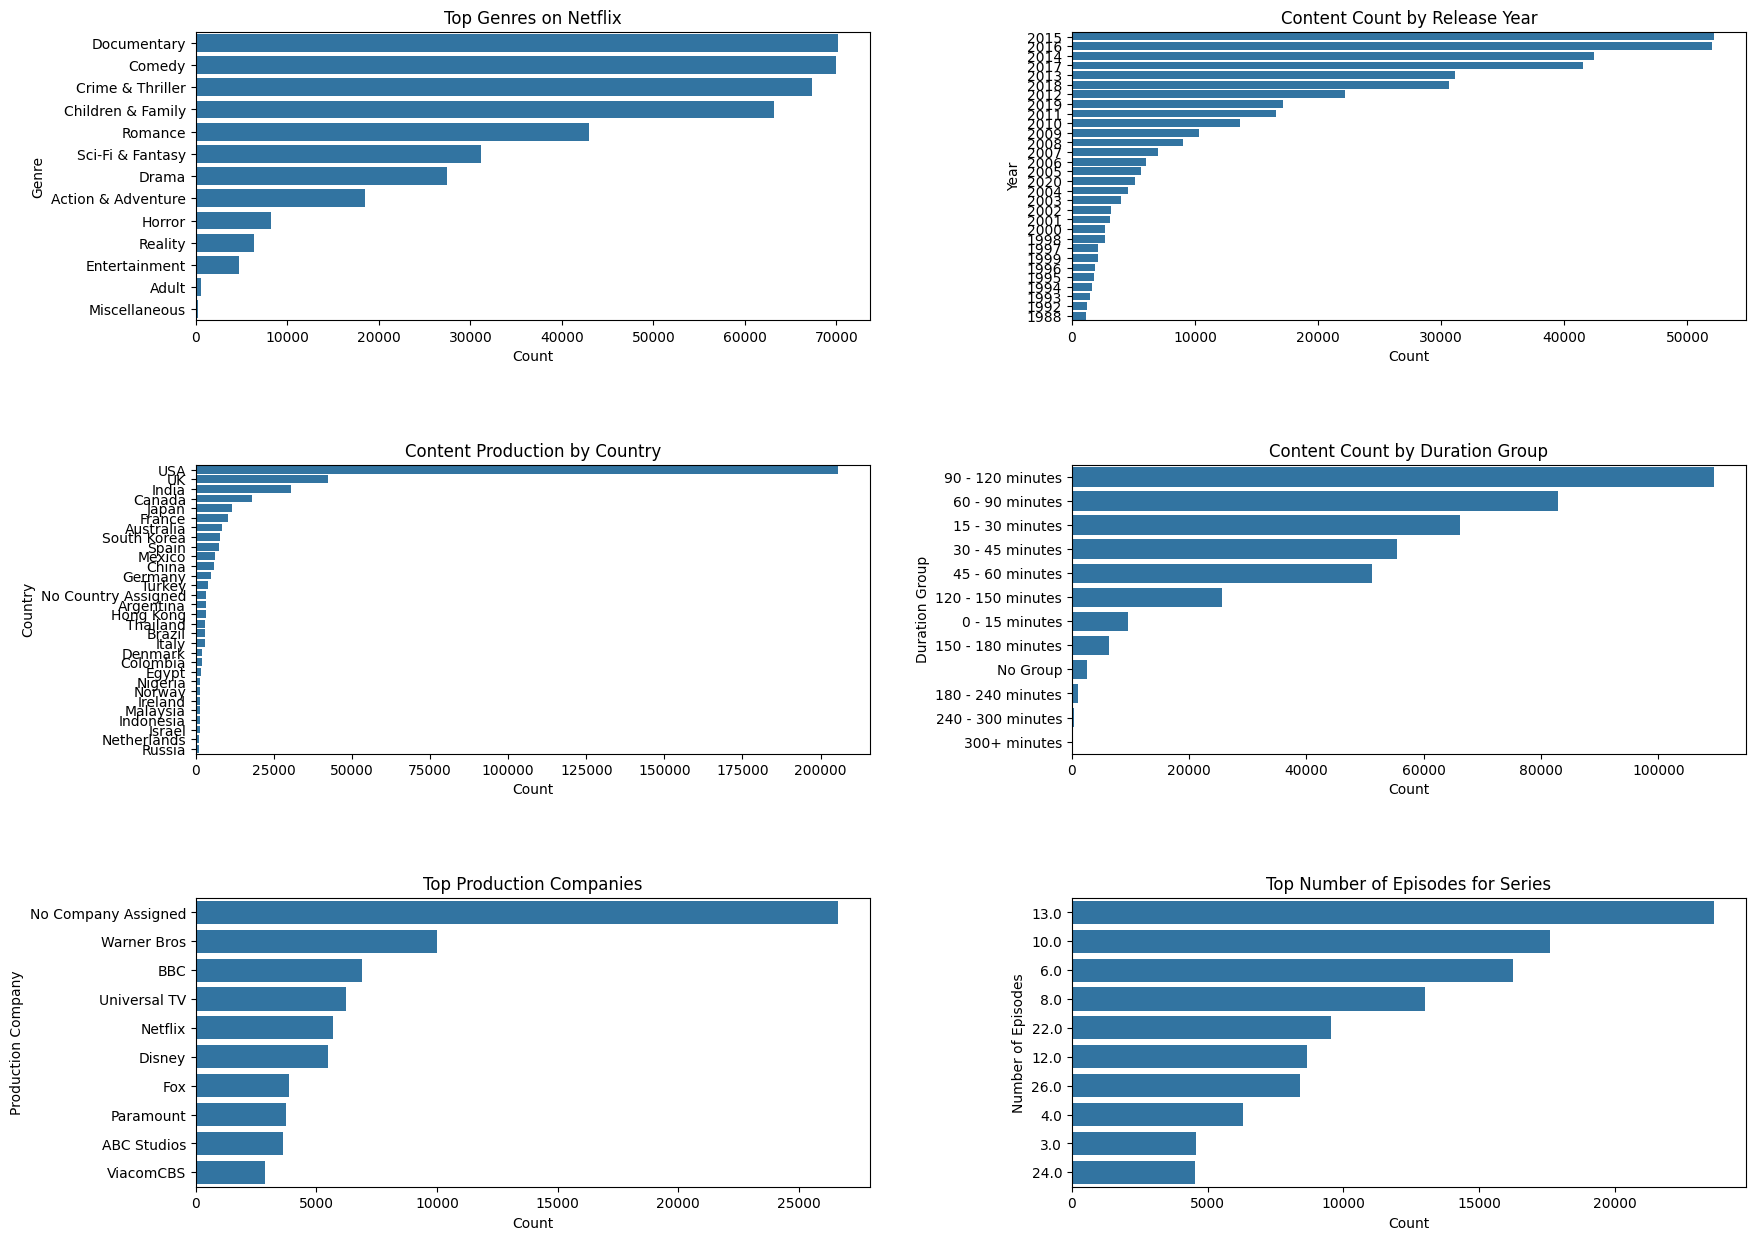

In [12]:
# 1. Analysis of popular content types
# Count the amount of content for each major genre
genre_counts = netflix_df['Primary Genre'].value_counts()

# 2. Release time analysis
# Count the number of content in each release year
release_year_counts = netflix_df['First Release Year'].value_counts().head(30)

# 3. Geographical distribution analysis
# Count the amount of content produced in each country
country_production_counts = netflix_df['Primary Production Country'].value_counts().head(30)

# 4. Content duration analysis
# Count the number of contents in each duration group
duration_group_counts = netflix_df['Duration Group'].value_counts()

# 5. Series analysis
# If it exists, count the number of episodes (here we assume that the number of episodes of the series is a number)
if 'Number of Episodes' in netflix_df.columns:
    netflix_df['Number of Episodes'] = pd.to_numeric(netflix_df['Number of Episodes'], errors='coerce')
    episode_counts = netflix_df['Number of Episodes'].value_counts()

# 6. Production company influence
# Count the amount of content produced by each production company
production_company_counts = netflix_df['Primary Production Company'].value_counts()


plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.subplot(3, 2, 1)
genre_counts_sorted = genre_counts.sort_values(ascending=False)
sns.barplot(x=genre_counts_sorted.values, y=genre_counts_sorted.index)
plt.title('Top Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')

plt.subplot(3, 2, 2)
release_year_counts_sorted = release_year_counts.sort_values(ascending=False)
sns.barplot(x=release_year_counts_sorted.values, y=release_year_counts_sorted.index)
plt.title('Content Count by Release Year')
plt.xlabel('Count')
plt.ylabel('Year')

plt.subplot(3, 2, 3)
country_production_counts_sorted = country_production_counts.sort_values(ascending=False)
sns.barplot(x=country_production_counts_sorted.values, y=country_production_counts_sorted.index)
plt.title('Content Production by Country')
plt.xlabel('Count')
plt.ylabel('Country')

plt.subplot(3, 2, 4)
duration_group_counts_sorted = duration_group_counts.sort_values(ascending=False)
sns.barplot(x=duration_group_counts_sorted.values, y=duration_group_counts_sorted.index)
plt.title('Content Count by Duration Group')
plt.xlabel('Count')
plt.ylabel('Duration Group')

plt.subplot(3, 2, 5)
production_company_counts_sorted = production_company_counts.sort_values(ascending=False).head(10) # 只展示前10个结果
sns.barplot(x=production_company_counts_sorted.values, y=production_company_counts_sorted.index)
plt.title('Top Production Companies')
plt.xlabel('Count')
plt.ylabel('Production Company')

plt.subplot(3, 2, 6)
episode_counts_sorted = episode_counts.sort_values(ascending=False).head(10) # 只展示前10个结果
sns.barplot(x=episode_counts_sorted.values, y=episode_counts_sorted.index.astype('str'))
plt.title('Top Number of Episodes for Series')
plt.xlabel('Count')
plt.ylabel('Number of Episodes')

plt.show()


The data from Amazon, Hulu, and Netflix provide insights into content trends and preferences in streaming platforms. Here are some conclusions based on the provided counts:

### Popular Genres
   - **Documentaries** are consistently popular across all three platforms, suggesting that there is a significant audience interested in non-fiction content.
   - **Comedy** and **Crime & Thriller** genres also rank high across all platforms, indicating a strong preference for entertainment that either elicits laughter or provides suspenseful storytelling.

### Content Release Timing
   - There is a noticeable presence of content from the mid-2010s, specifically around **2015 and 2016**. This could indicate either a boom in content creation during those years or that slightly older content remains popular on these platforms.

### Production Country
   - The **USA** is the leading content producer across all platforms, which is not surprising given the dominance of Hollywood and American media companies in global entertainment.
   - The **UK** also stands out as a significant content provider, likely due to the popularity of British television and film.

### Content Duration
   - For Amazon and Netflix, the most common content duration falls within **90 - 120 minutes**, which is typical for feature-length films.
   - Hulu shows a different trend with a higher count of content in the **15 - 30 minutes** range, indicating a possible preference for shorter formats like TV shows or short films.

### Episode Counts for Series
   - Across all platforms, series with around **10 to 13 episodes** per season seem popular. This aligns with the modern trend for seasons with fewer, more tightly scripted episodes, as opposed to the traditional 20+ episodes per season.

### Production Companies
   - The presence of a variety of production companies with no single overwhelming leader suggests that streaming platforms offer a diverse range of content from different producers.

## Conclusion for Streaming Platforms

- To attract a broad audience, a streaming platform should offer a diverse selection of content, with a good mix of documentaries, comedies, and thrillers.
- Content from the mid-2010s still holds significant appeal, so platforms should consider acquiring or maintaining libraries with content from this era.
- There is value in offering content from both the USA and internationally, with the UK being a key content provider.
- A mix of feature-length films and shorter content caters to different viewing preferences and situations.
- Series with 10 to 13 episodes per season are a sweet spot and likely to be well-received.
- A variety of content from different production companies can appeal to viewers with different tastes and prevent any single style or brand from dominating the platform's offering.



## What content is popular on TV?

In [63]:
file_path = '/content/drive/MyDrive/DSCI599/Datasets/Entertainment Dataset/Nielsen Dataset/Reach Data 2016 to 2020.csv'
tv_df = pd.read_csv(file_path)
tv_df.head()

,Unnamed: 0,Coverage Area,Market Break,Demographic,Schedule Name,Date,Originator,Program,Playback Period,Units,...,Qualified AA GRP%,Spot AA GRP Proj(units),Qualified AA GRP Proj(units),AA Effective Reach(3+),Weighted Intab,PESS,Unified Count,UE (000),UE/Proj Type,File
0,0,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,COMEDY CENTRAL,CHAPPELLES SHOW,Live+7 Days (+168 Hours) | TV with Digital | L...,6,...,1.086498,68015665,3311940,0.143063,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
1,1,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,AMC,BREAKING BAD MARATHON,Live+7 Days (+168 Hours) | TV with Digital | L...,2,...,0.386566,47466710,1178358,0.004686,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
2,2,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,CBS,"BIG BANG THEORY, THE-1/1",Live+7 Days (+168 Hours) | TV with Digital | L...,1,...,2.116748,151299653,6452420,0.000407,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
3,3,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,NBC,BETTER LATE THAN NEVER,Live+7 Days (+168 Hours) | TV with Digital | L...,1,...,2.137488,253579666,6515641,0.004577,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx
4,4,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,CBS,YOUNG SHELDON 830PM-SP,Live+7 Days (+168 Hours) | TV with Digital | L...,1,...,1.938229,147864817,5908244,0.000000,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx


In [59]:
# tv_df = tv_df.head(10)
unique_programs_df = pd.DataFrame(tv_df['Program'].unique(), columns=['Program'])
# unique_programs_df = unique_programs_df.head(30)

def adjust_and_search(program_name):
    """Try searching for the ID of the show, if that fails then gradually reduce the words"""
    program_name = program_name.replace(',', ' ')

    while True:
        try:
            id = find_program_id(program_name)
            if id or len(program_name.split()) <= 2:
                return id
        except IndexError:
            pass

        # Stop if name has been reduced to two words or search is successful
        words = program_name.split()
        if len(words) <= 2:
            return None

        # Remove last word and search again
        program_name = ' '.join(words[:-1])


def find_program_id(program_name):
    """Search and return the ID of the program based on the program name"""
    url = "https://imdb146.p.rapidapi.com/v1/find/"
    querystring = {"query": program_name}

    headers = {
        "X-RapidAPI-Key": "1dd6c04a23msh5c37cb1b9136efcp1f3a8djsn50a27d9023fd",
        "X-RapidAPI-Host": "imdb146.p.rapidapi.com"
    }
    try:
        response = requests.get(url, headers=headers, params=querystring)
        response.raise_for_status()  # Make sure the response status code is 200
        data = response.json()
        #Extract the ID of the first title result
        first_result_id = data['titleResults']['results'][0]['id']
        return first_result_id
    except Exception as e:
        print(f"Error finding program ID for {program_name}: {e}")
        return None

def get_program_genre(program_id):
    """Get the type of program using program ID"""
    url = "https://imdb146.p.rapidapi.com/v1/title/"
    querystring = {"id": program_id}
    headers = {
        "X-RapidAPI-Key": "1dd6c04a23msh5c37cb1b9136efcp1f3a8djsn50a27d9023fd",
        "X-RapidAPI-Host": "imdb146.p.rapidapi.com"
    }
    try:
        response = requests.get(url, headers=headers, params=querystring)
        response.raise_for_status()
        data = response.json()
        # Assume we are interested in the first type
        genre = data['genres']['genres'][0]['text'] if data['genres'] else 'Unknown'
        return genre
    except Exception as e:
        print(f"Error getting genre for program ID {program_id}: {e}")
        return 'Unknown'

# Add type for each show in DataFrame
genres = []
# print(unique_programs_df)
count = 0
for program in unique_programs_df['Program']:
    program_id = adjust_and_search(program)
    if program_id:
        genre = get_program_genre(program_id)
    else:
        genre = 'Not Found'
    # print(genre)
    genres.append(genre)
    count = count + 1

    if count % 100 == 0:
      print(count)


# Add the resulting list of types to the DataFrame
unique_programs_df['Genre'] = genres

Error finding program ID for  YOUNG SHELDON 830PM-SP : list index out of range
Error getting genre for program ID tt6226232: 404 Client Error: Not Found for url: https://imdb146.p.rapidapi.com/v1/title/?id=tt6226232
Error finding program ID for  YOUNG SHELDON 9PM-SP : list index out of range
Error finding program ID for  LUCIFER-SP NY 8P : list index out of range
Error finding program ID for  GIFTED  THE-SP NY 9P : list index out of range
Error getting genre for program ID tt18732278: list index out of range
Error finding program ID for  MODERN FAMILY-TUES 9:30PM : list index out of range
Error finding program ID for  SEAL TEAM : 404 Client Error: Not Found for url: https://imdb146.p.rapidapi.com/v1/find/?query=+SEAL+TEAM+
Error getting genre for program ID tt29199488: list index out of range
Error getting genre for program ID tt30779103: list index out of range
Error getting genre for program ID tt29834869: list index out of range
Error finding program ID for  AMER FUNN HM VIDEOS-7PM 

In [64]:
tv_df = tv_df.merge(unique_programs_df, on='Program', how='left')
tv_df

,Unnamed: 0,Coverage Area,Market Break,Demographic,Schedule Name,Date,Originator,Program,Playback Period,Units,...,Spot AA GRP Proj(units),Qualified AA GRP Proj(units),AA Effective Reach(3+),Weighted Intab,PESS,Unified Count,UE (000),UE/Proj Type,File,Genre
0,0,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,COMEDY CENTRAL,CHAPPELLES SHOW,Live+7 Days (+168 Hours) | TV with Digital | L...,6,...,68015665,3311940,0.143063,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx,Comedy
1,1,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,AMC,BREAKING BAD MARATHON,Live+7 Days (+168 Hours) | TV with Digital | L...,2,...,47466710,1178358,0.004686,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx,Documentary
2,2,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,CBS,"BIG BANG THEORY, THE-1/1",Live+7 Days (+168 Hours) | TV with Digital | L...,1,...,151299653,6452420,0.000407,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx,Comedy
3,3,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,NBC,BETTER LATE THAN NEVER,Live+7 Days (+168 Hours) | TV with Digital | L...,1,...,253579666,6515641,0.004577,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx,Documentary
4,4,Total US,Composite,Persons 2 - 99,USC Marshall Reach 2018 v1,01/01/2018,CBS,YOUNG SHELDON 830PM-SP,Live+7 Days (+168 Hours) | TV with Digital | L...,1,...,147864817,5908244,0.000000,304499468,43551,73452,304827,S,USC Marshall Reach 2018 v1.xlsx,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174884,37461,Total US,HHLD w/ SVOD Service = Any = No - SUBSCRIPTION,Persons 2 - 99,USC Marshall Reach 2017 v1,12/30/2017,FOX,LETHAL WEAPON-SP 12/30 9P,Live+7 Days (+168 Hours) | TV with Digital | L...,1,...,35264824,892966,0.000000,100894126,13411,23105,100894,C,USC Marshall Reach 2017 v1.xlsx,Action
174885,37462,Total US,HHLD w/ SVOD Service = Any = No - SUBSCRIPTION,Persons 2 - 99,USC Marshall Reach 2017 v1,12/31/2017,AMC,BREAKING BAD MARATHON,Live+7 Days (+168 Hours) | TV with Digital | L...,4,...,46385392,1043347,0.170518,100894126,13411,23105,100894,C,USC Marshall Reach 2017 v1.xlsx,Documentary
174886,37463,Total US,HHLD w/ SVOD Service = Any = No - SUBSCRIPTION,Persons 2 - 99,USC Marshall Reach 2017 v1,12/31/2017,CBS,S.W.A.T. SPECIAL-12/31,Live+7 Days (+168 Hours) | TV with Digital | L...,1,...,93051432,2510013,0.000000,100894126,13411,23105,100894,C,USC Marshall Reach 2017 v1.xlsx,Action
174887,37464,Total US,HHLD w/ SVOD Service = Any = No - SUBSCRIPTION,Persons 2 - 99,USC Marshall Reach 2017 v1,12/31/2017,CBS,SEAL TEAM SPECIAL-12/31,Live+7 Days (+168 Hours) | TV with Digital | L...,1,...,81804592,2251522,0.006924,100894126,13411,23105,100894,C,USC Marshall Reach 2017 v1.xlsx,Animation


In [67]:
pd.pivot_table(data = tv_df,
               index = ['Genre'],
               values = 'AA Reach Proj(units)',
               aggfunc = np.mean).reset_index().sort_values("AA Reach Proj(units)", ascending = False).head(20)

,Genre,AA Reach Proj(units)
24,Western,4.915244e+06
18,Sci-Fi,4.232951e+06
0,Action,3.590446e+06
7,Drama,3.372079e+06
5,Crime,3.205274e+06
14,Mystery,3.123878e+06
16,Not Found,2.897487e+06
4,Comedy,2.069453e+06
19,Short,2.017290e+06
22,Thriller,1.917044e+06


In [69]:
temp1 = pd.pivot_table(data = tv_df,
                        index = ['Genre'],
                        values = 'AA Reach Proj(units)',
                        aggfunc = np.mean).reset_index()
temp1.columns = ['Genre', 'Mean Reach Show']

temp2 = pd.pivot_table(data = tv_df,
                        index = ['Genre'],
                        values =  'AA Reach Proj(units)',
                        aggfunc = 'count').reset_index()
temp2.columns = ['Genre', 'N of Broadcast Days']


cdata = temp1.merge(temp2, on = 'Genre')

In [70]:
cdata.loc[cdata['N of Broadcast Days'] > 50].sort_values("Mean Reach Show", ascending = False).tail(50)

,Genre,Mean Reach Show,N of Broadcast Days
18,Sci-Fi,4.232951e+06,154
0,Action,3.590446e+06,31273
7,Drama,3.372079e+06,17556
5,Crime,3.205274e+06,16775
14,Mystery,3.123878e+06,165
16,Not Found,2.897487e+06,2068
4,Comedy,2.069453e+06,85316
19,Short,2.017290e+06,2079
22,Thriller,1.917044e+06,297
6,Documentary,1.843176e+06,2882


When examining the popularity of TV content by genre, the data indicates that genres such as Western and Sci-Fi top the list in terms of average projected audience reach. This suggests that TV viewers show a substantial interest in programming that provides escapism and imaginative storytelling. Following closely are Action and Drama genres, which combine compelling narratives with dynamic visuals, thus maintaining a strong viewership.

Interestingly, Comedy, which has an extensive number of broadcast days, suggests that while individual broadcasts may reach fewer viewers on average compared to the top genres, the overall exposure is significant due to its regular airing. This implies that Comedy enjoys a consistent and loyal audience. On the other hand, Documentary content, despite having a lower mean reach, benefits from a considerable number of broadcast days, indicating a dedicated audience for educational and real-life content.

Moreover, Sci-Fi shows, while highly popular in terms of reach per broadcast, are not shown as frequently, hinting at a model where each airing is an event that draws a large audience, potentially due to the genre's heavy reliance on special effects and higher production values which may limit the frequency of new content.

The data also suggests that certain genres like Horror, History, and Family, though they have the lowest reach, still maintain a presence on TV, catering to more specialized audiences. This variety in genre popularity and broadcast frequency illustrates the diverse strategies employed by TV networks to cater to different audience segments, balancing between genres that guarantee high viewership and those that ensure regular engagement over time.

## Would this work on streaming? Would certain content from TV not work for Streaming?

When comparing the data between traditional TV and streaming platforms, it becomes apparent that different content types have varying degrees of popularity and suitability for each platform. Let's explore the distinctions and consider why some content may be more successful on one platform over the other.

**Popularity Differences:**
- **Documentaries** show a significant presence on streaming platforms, indicating that streaming audiences may prefer content that they can watch at their own pace, perhaps due to the often dense and informative nature of documentaries that viewers may want to consume without the constraints of a TV schedule.
  
- **Comedies** are consistently present on TV, which can be attributed to their nature of providing a quick and accessible form of entertainment that fits well with the traditional TV model of scheduled programming. On streaming platforms, while comedies are popular, they compete with a broader variety of accessible content.

- **Genres like Western and Sci-Fi** have high average audience reach on TV, likely due to their appeal as event-type content that can draw viewers in for specific airings. Streaming platforms, with their lack of scheduling, can struggle to create the same sense of event viewing but offer the advantage of attracting dedicated fans who prefer to immerse themselves in content without interruption.

**Platform Suitability:**
- **Streaming platforms** tend to have a broader range of genres with a more balanced distribution of popularity across them. This is likely because streaming platforms offer niche content to a diverse audience with varied tastes, who are looking for content that isn't always available on traditional TV.

- **Traditional TV** relies on regularly scheduled programming that can attract a consistent audience at set times. Genres that do well in this environment, such as action, drama, and reality-TV, offer episodic content that viewers can follow on a weekly basis, creating a routine and potentially fostering a communal viewing experience.

**Why Some Content Is Better Suited for Streaming:**
- Content that benefits from uninterrupted viewing, such as long-form dramas, serialized storytelling, or complex Sci-Fi worlds, is well-suited to streaming platforms where viewers can watch multiple episodes or even entire seasons in one sitting.
  
- Streaming platforms also allow for more experimentation with content, providing a home for less mainstream genres, such as documentaries or art-house films, which can be more challenging to broadcast on traditional TV due to their niche appeal.

**Why Some Content Is Better Suited for TV:**
- TV is conducive to content that fits into a regular viewing schedule, such as nightly talk shows, weekly reality-TV episodes, or daily news broadcasts. The episodic nature of such content can benefit from the anticipation and discussion that builds between episodes.
  
- Live events, sports, and other types of programming that benefit from being watched in real-time are more suited to traditional TV, as they capitalize on the collective viewing experience and the immediate nature of broadcast television.
